<a href="https://colab.research.google.com/github/hello-the-vsworld/HyperTS-play/blob/main/Hyper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hyperts


In [27]:
!git clone https://github.com/DataCanvasIO/HyperTS.git
!cd HyperTS


fatal: destination path 'HyperTS' already exists and is not an empty directory.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/HyperTS")
!git clone https://github.com/DataCanvasIO/HyperTS.git
!cd HyperTS
!python setup.py
!pip install -e . 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [18]:
import pandas as pd
date = pd.read_excel('/content/f2English.xlsx',header=0,)
date=pd.DataFrame(date)
train_data, test_data = train_test_split(date, test_size=100, shuffle=False)

In [19]:
from hyperts import make_experiment
train_data.copy()

,time,F2,F2zhu,F2shang,F2jichui,...,F2xiagongshui,F2xiazhishui,F2shuchuchou1shui,F22shui,F2shuruzhoushui
0,2018-01-19 12:50:16.369,70.5320,18.9890,-230.1970,0.0090,...,-0.0890,-0.0210,0.0070,-0.0050,0.0080
1,2018-01-19 12:50:16.370,70.3380,18.9890,-230.1970,0.0090,...,-0.0880,-0.0210,0.0070,-0.0050,0.0080
2,2018-01-19 12:50:16.371,70.5320,18.7960,-230.0030,0.0090,...,-0.0900,-0.0210,0.0070,-0.0050,0.0090
3,2018-01-19 12:50:16.372,70.5320,18.7960,-230.1970,0.0100,...,-0.0900,-0.0210,0.0070,-0.0040,0.0090
4,2018-01-19 12:50:16.373,70.5320,18.7960,-230.0030,0.0100,...,-0.0870,-0.0210,0.0070,-0.0050,0.0090
...,...,...,...,...,...,...,...,...,...,...,...
19896,2018-01-19 12:50:36.265,70.5320,18.7960,-229.4220,0.0080,...,-0.0900,-0.0200,0.0070,-0.0050,0.0080
19897,2018-01-19 12:50:36.266,70.3380,18.6020,-228.8400,0.0090,...,-0.0890,-0.0200,0.0070,-0.0040,0.0090
19898,2018-01-19 12:50:36.267,70.3380,18.7960,-228.8400,0.0090,...,-0.0900,-0.0200,0.0070,-0.0040,0.0090
19899,2018-01-19 12:50:36.268,70.5320,18.7960,-229.4220,0.0090,...,-0.0900,-0.0200,0.0070,-0.0040,0.0090


In [ ]:
experiment = make_experiment(train_data,
                model = 'dl', 
                reward_metric='mae',
                optimize_direction='min',
                freq='1L', 
                max_trials=10,
                task='multivariate-forecast',
                timestamp='time',
                covariables=['F2','F2zhu','F2shang','F2jichui','F2yachui', 'F2xiazhichui', 'F2shangzhishui','F2xiazhishui','F2shuchuchou1shui'])
model = experiment.run()

In [22]:
X_test, y_test = model.split_X_y(test_data.copy())
forecast = model.predict(X_test)
forecast.head()

,time,F2shangzhichui,F2shanggongchui,F2xia,F2shanggongshui,F2xiagongshui,F22shui,F2shuruzhoushui
0,2018-01-19 12:50:36.270,-0.0007,0.0020,0.0028,0.0019,-0.0888,-0.0044,0.0083
1,2018-01-19 12:50:36.271,-0.0007,0.0023,0.0026,0.0019,-0.0889,-0.0047,0.0079
2,2018-01-19 12:50:36.272,-0.0008,0.0027,0.0020,0.0023,-0.0886,-0.0047,0.0087
3,2018-01-19 12:50:36.273,-0.0010,0.0027,0.0020,0.0022,-0.0887,-0.0043,0.0090
4,2018-01-19 12:50:36.274,-0.0010,0.0023,0.0020,0.0021,-0.0890,-0.0037,0.0090


In [23]:
results = model.evaluate(y_true=y_test, y_pred=forecast)
results.head()

,Metirc,Score
0,mae,0.0007
1,mse,0.0000
2,rmse,0.0009
3,mape,189429805797.0422
4,smape,0.3961


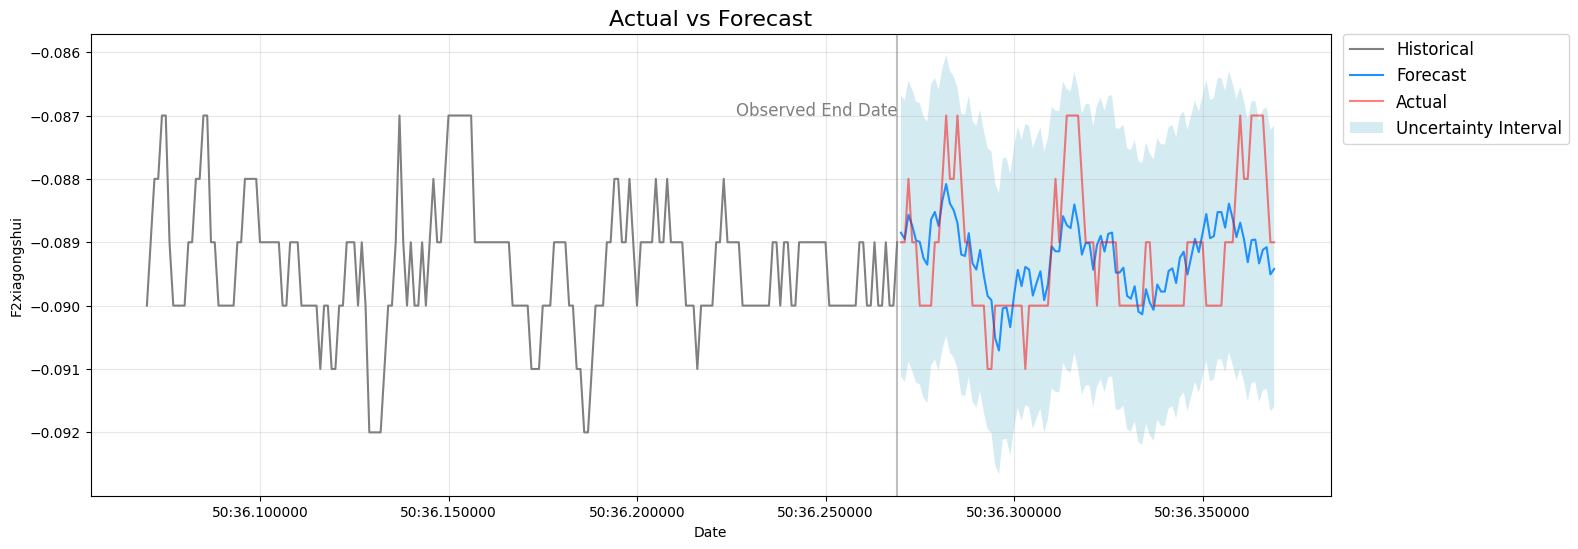

In [24]:
model.plot(forecast=forecast, actual=test_data,var_id='F2xiagongshui', interactive=False)